<h1><center>Deep Learning Fundamentals </center></h1>
<h3><center> Trimester 3, 2023 </center></h3>
<h3><center> Assignment - 1 </center></h3>
<h3><center> Predict diabetes using Perceptron </center></h3>

##### **Loading Libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

###### Loading Dataset

In [2]:
DataFrame_DLF = pd.read_csv('diabetes.csv')
DataFrame_DLF.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


###### Choosing Important Features

<Axes: >

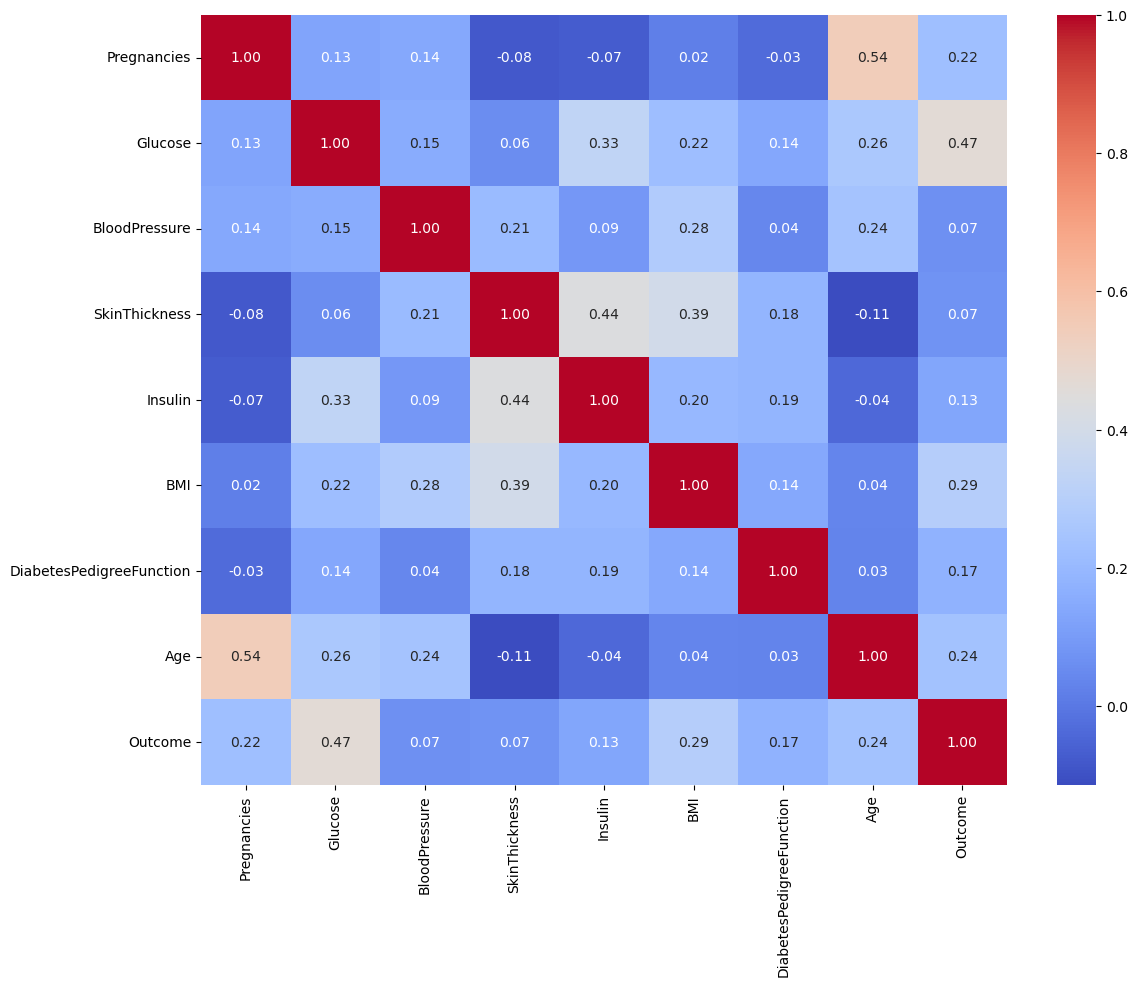

In [3]:
plt.figure(figsize=(13,10))
sns.heatmap(DataFrame_DLF.corr(),annot=True, fmt = ".2f", cmap = "coolwarm")

###### Checking For Any Missing Value

In [4]:
DataFrame_DLF.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

###### Data Splitting and Pre-processing

In [5]:
Important_DLF = DataFrame_DLF.loc[:, ['Pregnancies', 'Glucose', 'BMI', 'Age']].values
Outcomes_DLF = DataFrame_DLF.iloc[:, -1].values

Important_DLF_train, Important_DLF_test, Outcomes_DLF_train, Outcomes_DLF_test = train_test_split(Important_DLF, Outcomes_DLF, test_size=0.25, random_state=104)
sc = StandardScaler()
Important_DLF_train = sc.fit_transform(Important_DLF_train)
Important_DLF_test = sc.transform(Important_DLF_test)

###### Defining Perceptron Algorithm

In [6]:
class PerceptronAlgorithm:
    def __init__(self, learning_rate_dlf, num_epochs_dlf, num_features_dlf):
        self.learning_rate_dlf = learning_rate_dlf
        self.num_epochs_dlf = num_epochs_dlf
        self.num_features_dlf = num_features_dlf

    def fit(self, Important_DLF, Outcomes_DLF):
        self.weights_dlf = np.zeros(self.num_features_dlf)
        self.bias_dlf = 0

        for epoch_dlf in range(self.num_epochs_dlf):
            for i in range(Important_DLF.shape[0]):
                Outcomes_DLF_pred = np.dot(Important_DLF[i], self.weights_dlf) + self.bias_dlf

                if Outcomes_DLF_pred >= 0:
                    update = self.learning_rate_dlf * (Outcomes_DLF[i] - 1)
                else:
                    update = self.learning_rate_dlf * Outcomes_DLF[i]
                    
                self.weights_dlf += update * Important_DLF[i]
                self.bias_dlf += update

    def predict(self, Important_DLF):
        Outcomes_DLF_pred = np.dot(Important_DLF, self.weights_dlf) + self.bias_dlf
        return np.where(Outcomes_DLF_pred >= 0, 1, 0)

###### Evaluating Model

In [31]:
DLF_obj = PerceptronAlgorithm(learning_rate_dlf=0.01, num_epochs_dlf=50, num_features_dlf=Important_DLF_train.shape[1])

DLF_obj.fit(Important_DLF_train, Outcomes_DLF_train)

Outcomes_DLF_pred = DLF_obj.predict(Important_DLF_test)

###### Accuracy 

In [32]:
accuracy_score(Outcomes_DLF_test, Outcomes_DLF_pred)

0.796875

###### Confusion Matrix

In [33]:
print(confusion_matrix(Outcomes_DLF_test, Outcomes_DLF_pred))

[[107  21]
 [ 18  46]]


###### Report 

In [34]:
print(classification_report(Outcomes_DLF_test, Outcomes_DLF_pred))

              precision    recall  f1-score   support

           0       0.86      0.84      0.85       128
           1       0.69      0.72      0.70        64

    accuracy                           0.80       192
   macro avg       0.77      0.78      0.77       192
weighted avg       0.80      0.80      0.80       192

